In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
import cmath
from math import *

display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.'''))

# Input x value range
x_range = np.linspace(0, 5*cmath.pi, 1000)

# Complex imaginary constant
i = cmath.sqrt(-1)

# Input Signal: Frequencies 4, 7, 15

In [2]:
f = lambda x: sin(x*4) + sin(x*7) + sin(x*15)

<IPython.core.display.Javascript object>


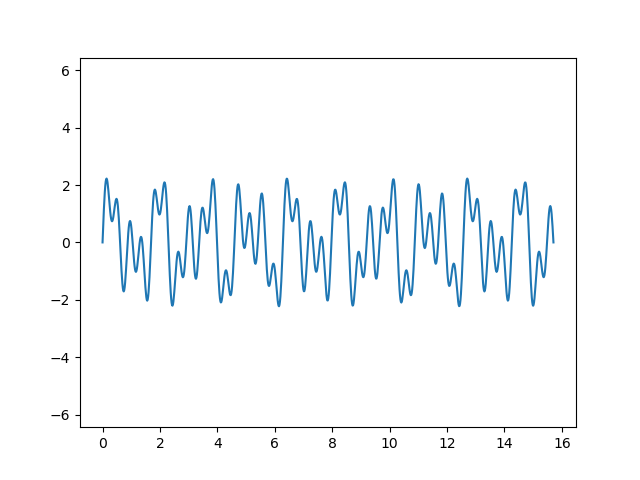

In [3]:
# Evaluate input signal on x range, plot the result
y = np.vectorize(f)(x_range)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', 'datalim')
ax.plot(x_range, y)


# Curled Representation

Move the slider to see curls for different frequencies

<IPython.core.display.Javascript object>


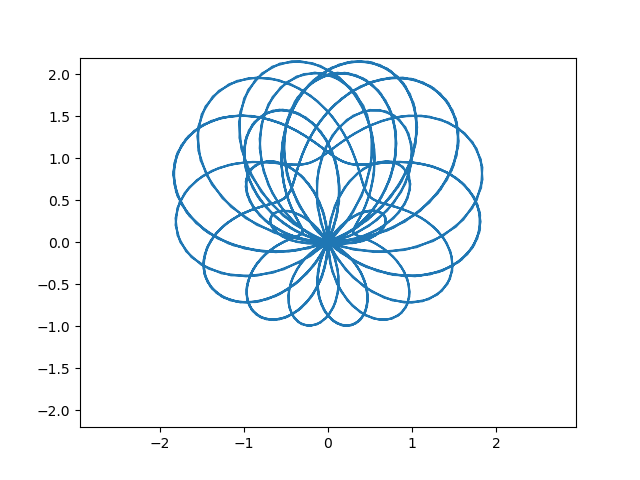

interactive(children=(FloatSlider(value=4.0, description='Frequency', layout=Layout(height='80px', width='100%…

In [4]:
# Curling works by exponentiation of i*x
curl = lambda x, y, freq: y * cmath.exp(freq*i*x)

freq_slider = widgets.FloatSlider(description="Frequency",value=4.0,min=0.0,max=7,step=0.05,layout=widgets.Layout(width='100%', height='80px'))
curl_plot_fig = plt.figure()
curl_plot_ax = curl_plot_fig.add_subplot(1, 1, 1)
curl_plot_ax.set_aspect('equal', 'datalim')
curl_plot_line, = curl_plot_ax.plot(range(-2, 3), range(-2, 3))

def update_on_user_interaction(freq = 1.0):
    # Compute list of curled complex numbers for input signal
    curled = [curl(x_k, f(x_k), freq) for x_k in x_range]
    # Unzip into x and y arrays, getting real and imaginary components
    curled_x = [c.real for c in curled]
    curled_y = [c.imag for c in curled]
    curl_plot_line.set_data(curled_x, curled_y)
    curl_plot_fig.canvas.draw()
    
widgets.interact(update_on_user_interaction, freq = freq_slider)
update_on_user_interaction(4.0)

# Fourier Transform

<IPython.core.display.Javascript object>


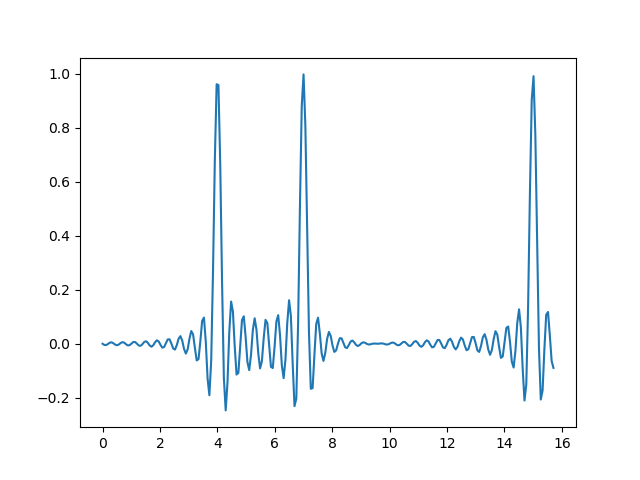

In [5]:
y = []

# Choose frequency range between 0 and 5*pi
freq_range = np.linspace(0, 5*cmath.pi, 250)

# For each possible frequency, compute the imaginary part of the center of gravity of the curled representation
for freq in freq_range:
    curled = [curl(x_k, f(x_k), freq) for x_k in x_range]
    # Get the average imaginary part of the curl for this frequency
    cog = sum([c.imag for c in curled]) / 500
    y.append(cog)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.plot(freq_range, y)